# Analysis 

Part1. Analysis around GeoTopicParser

Part2. Analysis around Spacy

Part3. Analysis around AI image

Part4. Comprehensive Analysis  

## Part 1. 

In [ ]:
import pandas as pd 
tsv1 = pd.read_csv('../data/arcgis_img_captions_objects_final2.tsv',sep='\t') 
geo = pd.read_csv('../data/tsv2_geo.tsv',sep='\t') 

#tsv2_geo = pd.concat([tsv1, geo],axis=1) 
tsv2_geo = tsv1.merge(geo, how='left', on=['city','country','location','description','state','state_abbrev','longitude','latitude','city_longitude','city_latitude','date_occured'])
tsv2_geo.shape

(9735, 39)

In [ ]:
# Remap the Apparition_Type into a few categories
tsv2_geo['Apparition_Type'].unique()

array(['Ghost', 'Unknown', 'Orb', 'Ghost, Orb', 'Ghost, Female, Child',
       'Ghost, Several Ghosts', 'Ghost, Male', 'Male', 'Female', 'UAP',
       'Ghost, Female', 'Several Ghosts', 'UFO', 'Ghost, UFO',
       'Ghost, Orb, Several Ghosts', 'Ghost, Male, Several Ghosts',
       'Orb, UAP', 'Orb, Male, Several Ghosts', 'Ghost, Child',
       'Orb, Male', 'Ghost, UAP', 'Ghost, Orb, Female'], dtype=object)

In [ ]:
tsv2_geo = pd.read_csv('../data/tsv2_with_geotopic_and_AIimg.tsv',sep='\t')

def appar_filter(x):
    if ('Ghost' in x or 'Orb' in x) and ('UAP' in x or 'UFO' in x):
        return 3 
    elif 'UAP' in x or 'UFO' in x:
        return 2 
    elif 'Orb' in x or 'Ghost' in x: 
        return 1  
    else:
        return 0 

tsv2_geo['Apparition_Type2'] = tsv2_geo['Apparition_Type'].map(lambda x: appar_filter(x))

(609, 6)


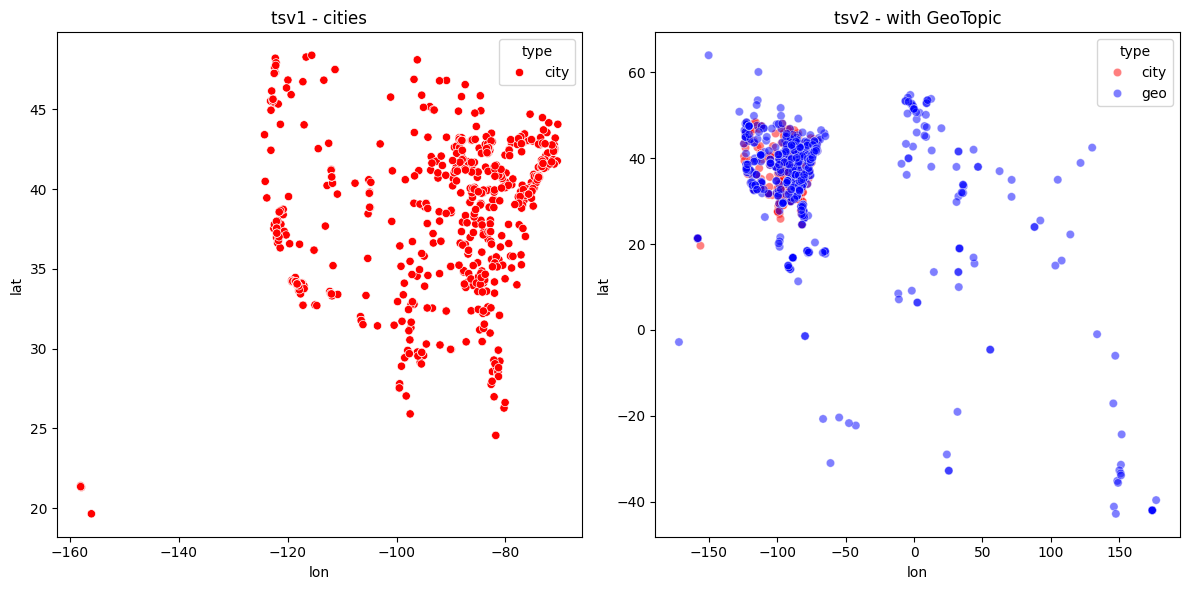

In [2]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

plot_df = tsv2_geo.dropna(subset=['geo_name','geo_lat','geo_lon'],how='all')
plot_df = plot_df[['city','city_longitude','city_latitude','geo_name','geo_lat','geo_lon']]
print(plot_df.shape)

# Reshape the data
city_df = plot_df[['city_longitude', 'city_latitude']].copy()
city_df.columns = ['lon', 'lat']
city_df['type'] = 'city'

geo_df = plot_df[['geo_lon', 'geo_lat']].copy()
geo_df.columns = ['lon', 'lat']
geo_df['type'] = 'geo'

combined_df = pd.concat([city_df, geo_df], ignore_index=True)

# Plot
## subplots
fig, axes = plt.subplots(1, 2, figsize=(12,6)) 
sb.scatterplot(data=city_df, x='lon', y='lat', hue='type', palette={'city':'red'}, ax=axes[0])
axes[0].set_title("tsv1 - cities")

sb.scatterplot(data=combined_df, x='lon', y='lat', hue='type', palette={'city': 'red', 'geo': 'blue'}, alpha=0.5, ax=axes[1])
axes[1].set_title("tsv2 - with GeoTopic")

plt.tight_layout()
plt.show()

(609, 7)


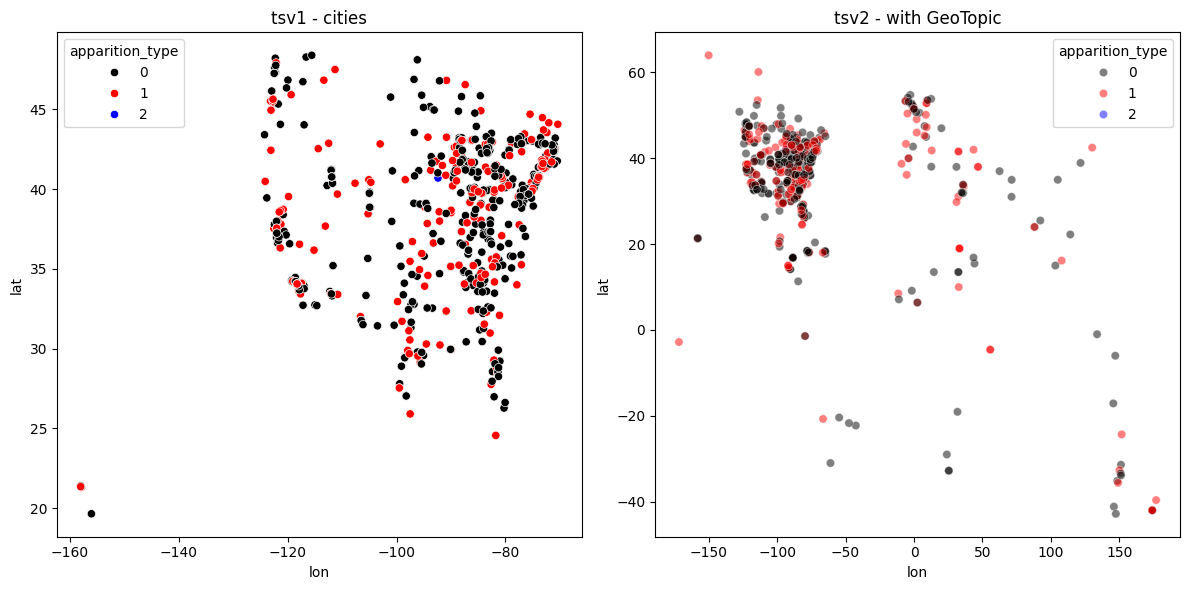

In [108]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

plot_df = tsv2_geo.dropna(subset=['geo_name','geo_lat','geo_lon'],how='all')
plot_df = plot_df[['city','city_longitude','city_latitude','geo_name','geo_lat','geo_lon','Apparition_Type2']]
print(plot_df.shape)

# Reshape the data
city_df2 = plot_df[['city_longitude', 'city_latitude','Apparition_Type2']].copy()
city_df2.columns = ['lon', 'lat','apparition_type']


geo_df2 = plot_df[['geo_lon', 'geo_lat','Apparition_Type2']].copy()
geo_df2.columns = ['lon', 'lat','apparition_type']

combined_df2 = pd.concat([city_df2, geo_df2], ignore_index=True)

# Plot
## subplots
fig, axes = plt.subplots(1, 2, figsize=(12,6)) 
sb.scatterplot(data=city_df2, x='lon', y='lat', hue='apparition_type', palette={0:'black',1:'red',2:'blue',3:'orange'}, ax=axes[0])
axes[0].set_title("tsv1 - cities")

sb.scatterplot(data=geo_df2, x='lon', y='lat', hue='apparition_type', palette={0:'black',1:'red',2:'blue',3:'orange'}, alpha=0.5, ax=axes[1])
axes[1].set_title("tsv2 - with GeoTopic")

plt.tight_layout()
plt.show()

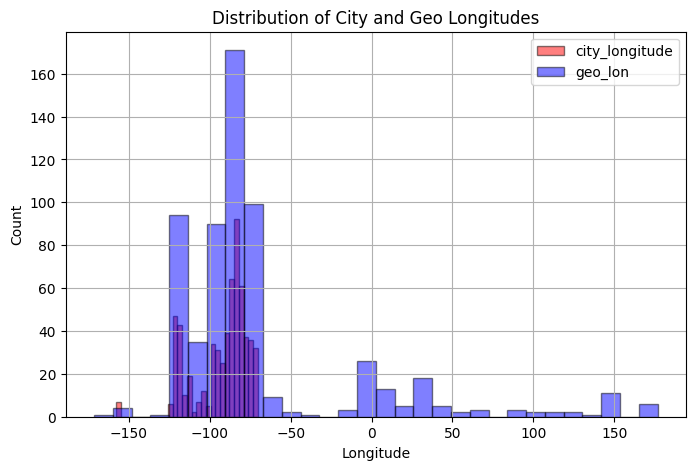

In [36]:
# Histogram of location alongside longitude(South to North)
plt.figure(figsize=(8, 5))
plt.hist(plot_df['city_longitude'], bins=30, alpha=0.5, label='city_longitude', color='red', edgecolor='black')
plt.hist(plot_df['geo_lon'], bins=30, alpha=0.5, label='geo_lon', color='blue', edgecolor='black')
plt.xlabel('Longitude')
plt.ylabel('Count')
plt.title('Distribution of City and Geo Longitudes')
plt.legend()
plt.grid(True)
plt.show()


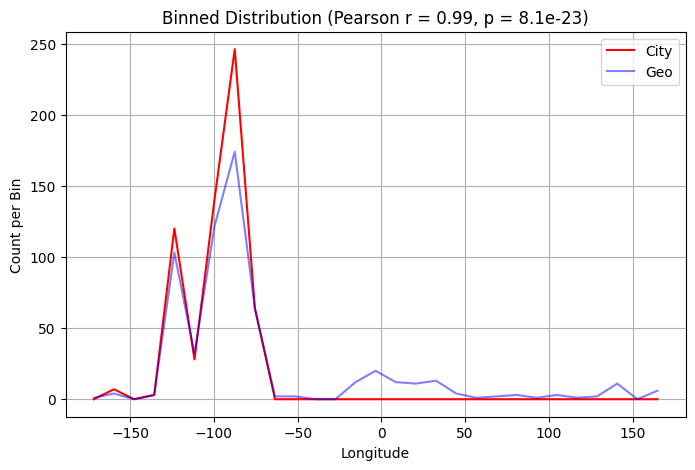

In [37]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# 1. Define bins
bins = np.linspace(min(plot_df[['city_longitude', 'geo_lon']].min()),
                   max(plot_df[['city_longitude', 'geo_lon']].max()), 30)

# 2. Histogram counts
city_hist, _ = np.histogram(plot_df['city_longitude'], bins=bins)
geo_hist, _ = np.histogram(plot_df['geo_lon'], bins=bins)

# 3. Compute correlation
corr, pval = pearsonr(city_hist, geo_hist)

# 4. (Optional) Plot both histograms
plt.figure(figsize=(8, 5))
plt.plot(bins[:-1], city_hist, label='City', color='red')
plt.plot(bins[:-1], geo_hist, label='Geo', color='blue',alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Count per Bin')
plt.title(f'Binned Distribution (Pearson r = {corr:.2f}, p = {pval:.2g})')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
bins[2]-bins[3]

np.float64(-0.09055027279813999)

In [72]:
# Define shared bins (e.g., 30 equally spaced bins across all longitudes)
def hist_stat_report(df, feature_1, feature_2, num_bins=30):
    bins = np.linspace(
        min(df[[feature_1, feature_2]].min()),
        max(df[[feature_1, feature_2]].max()),
        num_bins
    )

    # Histogram counts
    city_hist, _ = np.histogram(df[feature_1], bins=bins)
    geo_hist, _ = np.histogram(df[feature_2], bins=bins)

    # Bin centers (for interpretation)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # Function to compute average, median, and most frequent bin center
    def histogram_stats(hist_counts, bin_centers):
        total = hist_counts.sum()
        # Weighted average
        avg = np.sum(hist_counts * bin_centers) / total
        # Cumulonive sum for median
        cum_counts = np.cumsum(hist_counts)
        median_bin_idx = np.searchsorted(cum_counts, total / 2)
        median = bin_centers[median_bin_idx]
        # Most frequent bin
        max_bin_idx = np.argmax(hist_counts)
        mode = bin_centers[max_bin_idx]
        return avg, median, mode

    # Get stats
    city_avg, city_median, city_mode = histogram_stats(city_hist, bin_centers)
    geo_avg, geo_median, geo_mode = histogram_stats(geo_hist, bin_centers)

    # Print nicely
    print(f"{feature_1} Stats:")
    print(f"  Average: {city_avg:.4f}")
    print(f"  Median:  {city_median:.4f}")
    print(f"  Mode:    {city_mode:.4f} (Most frequent bin center)")

    print(f"\n{feature_2} Stats:")
    print(f"  Average: {geo_avg:.4f}")
    print(f"  Median:  {geo_median:.4f}")
    print(f"  Mode:    {geo_mode:.4f} (Most frequent bin center)")


hist_stat_report(plot_df, 'city_longitude', 'geo_lon')

city_longitude Stats:
  Average: -92.3361
  Median:  -81.5414
  Mode:    -81.5414 (Most frequent bin center)

geo_lon Stats:
  Average: -68.7536
  Median:  -81.5414
  Mode:    -81.5414 (Most frequent bin center)


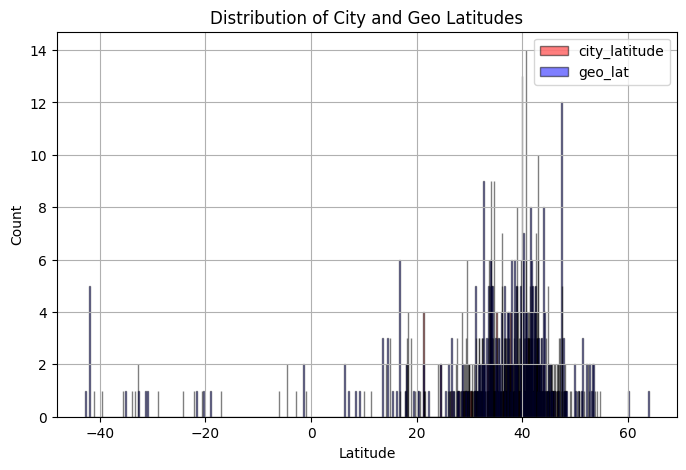

In [71]:
# Histogram of location alongside latitude
plt.figure(figsize=(8, 5))
plt.hist(plot_df['city_latitude'], bins=1180, alpha=0.5, label='city_latitude', color='red', edgecolor='black')
plt.hist(plot_df['geo_lat'].dropna(), bins=1180, alpha=0.5, label='geo_lat', color='blue', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Count')
plt.title('Distribution of City and Geo Latitudes')
plt.legend()
plt.grid(True)
plt.show()


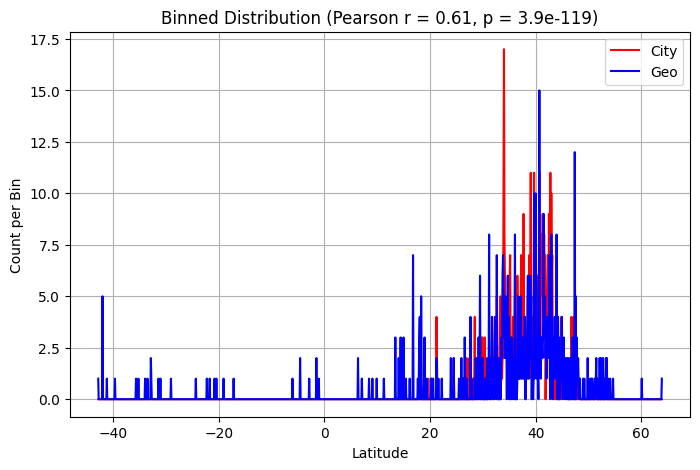

In [67]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# 1. Define bins
bins = np.linspace(min(plot_df[['city_latitude', 'geo_lat']].min()),
                   max(plot_df[['city_latitude', 'geo_lat']].max()), 1180)

# 2. Histogram counts
city_hist, _ = np.histogram(plot_df['city_latitude'], bins=bins)
geo_hist, _ = np.histogram(plot_df['geo_lat'], bins=bins)

# 3. Compute correlation
corr, pval = pearsonr(city_hist, geo_hist)

# 4. (Optional) Plot both histograms
plt.figure(figsize=(8, 5))
plt.plot(bins[:-1], city_hist, label='City', color='red')
plt.plot(bins[:-1], geo_hist, label='Geo', color='blue')
plt.xlabel('Latitude')
plt.ylabel('Count per Bin')
plt.title(f'Binned Distribution (Pearson r = {corr:.2f}, p = {pval:.2g})')
plt.legend()
plt.grid(True)
plt.show()


In [68]:
bins[0]- bins[1]

np.float64(-0.09060244274809293)

In [73]:
hist_stat_report(plot_df, 'city_latitude', 'geo_lat',1180)

city_latitude Stats:
  Average: 38.1211
  Median:  39.1299
  Mode:    34.0562 (Most frequent bin center)

geo_lat Stats:
  Average: 33.9827
  Median:  38.5863
  Mode:    40.7608 (Most frequent bin center)


In [12]:
# The number of records in tsv2
print(len(tsv2_geo))

# The number of records which has non-NA in the columns generated by GeoTopicParser
print(len(plot_df))

9735
609


In [112]:
# The number of Exactly identical location names 
filter_1 = (tsv2_geo['location']==tsv2_geo['geo_name'])
filter_2 = (tsv2_geo['longitude'].apply(lambda x: round(float(x),1))==tsv2_geo['geo_lon'].apply(lambda x: round(float(x),1)))&(tsv2_geo['latitude'].apply(lambda x: round(float(x),1))==tsv2_geo['geo_lat'].apply(lambda x: round(float(x),1)))
print(len(tsv2_geo[filter_1]))
print(len(tsv2_geo[filter_1 & filter_2]))
tsv2_geo[filter_1] 

14
1


,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude,...,interstate_gaspipe_within_10miles,mental_health_provider,mental_health_RGB,IMG_LOC,caption,objects,geo_name,geo_lat,geo_lon,Apparition_Type2
464,Allegheny,United States,Old Mill Rd. - Gravity Hill - At the stop sign...,North Park,Pennsylvania,PA,-80.017419,40.610840,-80.008775,40.445081,...,False,135.0,"(np.int64(216), np.int64(202), np.int64(195))",../data/Images/image_464.png,a stop sign on the side of the road .,street sign,North Park,43.71833,-79.47667,0
1065,Simi Valley,United States,When the Indian Hills area was built there wer...,Indian Hills,California,CA,-118.686314,34.288428,-118.781482,34.269447,...,False,450.0,"(np.int64(143), np.int64(196), np.int64(194))",../data/Images/image_1065.png,a herd of sheep grazing on a lush green hillsi...,"bighorn, bighorn sheep, cimarron, Rocky Mounta...",Indian Hills,38.27257,-85.66274,0
1697,Redlands,United States,Prospect Park in Redlands is known to be haunt...,Prospect Park,California,CA,-117.172796,34.039136,-117.182538,34.055569,...,False,450.0,"(np.int64(143), np.int64(196), np.int64(194))",../data/Images/image_1695.png,a group of people sitting on a bench in a park .,"lakeside, lakeshore, palace",Prospect Park,41.51701,-78.21556,1
2153,Atwater,United States,"Formerly part of Castle Air Force Base, it hou...",Castle Air Museum,California,CA,-120.577952,37.366780,-120.609084,37.347717,...,False,450.0,"(np.int64(143), np.int64(196), np.int64(194))",../data/Images/image_2151.png,a large propeller plane sitting on top of an a...,"warplane, military plane",Castle Air Museum,37.36661,-120.57825,0
2660,Peoria,United States,In the back of Lake Pleasant there have been m...,Lake Pleasant,Arizona,AZ,-112.280129,33.888697,-112.237378,33.580596,...,False,182.0,"(np.int64(205), np.int64(100), np.int64(138))",../data/Images/image_2658.png,a group of people on a boat in the water .,"sandbar, sand bar, cliff, drop, drop-off",Lake Pleasant,43.47090,-74.41265,0
3454,Cincinnati,United States,There are many reports of hauntings on this ro...,Buffalo Ridge,Ohio,OH,-84.711584,39.194839,-84.512020,39.103118,...,False,326.0,"(np.int64(192), np.int64(204), np.int64(198))",../data/Images/image_3452.png,a car parked on the side of the road .,"racer, race car, racing car, beach wagon, stat...",Buffalo Ridge,36.73708,-80.24866,0
3506,Columbus,United States,Ohio State - There was a student who drowned i...,Mirror Lake,Ohio,OH,-83.014233,39.997997,-82.998794,39.961176,...,False,326.0,"(np.int64(192), np.int64(204), np.int64(198))",../data/Images/image_3504.png,a black and white photo of a lake,"lakeside, lakeshore",Mirror Lake,49.88333,-116.90000,0
4332,Midland,United States,Legend states that The Knights of The White Ch...,Potters Field,North Carolina,NC,-80.557593,35.367671,-80.500622,35.227366,...,False,315.0,"(np.int64(198), np.int64(206), np.int64(200))",../data/Images/image_4330.png,a park bench in the middle of a park .,"park bench, warthog",Potters Field,32.87545,-111.95889,0
4805,Buffalo,United States,"A husband & wife who were archaeologists, went...",Grand Island,New York,NY,-78.891497,42.957993,-78.878369,42.886447,...,False,396.0,"(np.int64(173), np.int64(199), np.int64(195))",../data/Images/image_4803.png,a black and white photo of a man sitting on a ...,"tricycle, trike, velocipede, park bench",Grand Island,40.92501,-98.34201,1
6270,McNabb,United States,The owners of the Putnam County Junior High Jo...,Putnam County,Illinois,IL,-89.209252,41.176980,-89.209252,41.176980,...,False,314.0,"(np.int64(199), np.int64(204), np.int64(199))",../data/Images/image_6266.png,a group of people standing in a room .,"cash machine, cash dispenser, automated teller...",Putnam County,41.42666,-73.74951,0


In [113]:
import numpy as np

# Step 1: Compute lat/lon degree threshold
km_range = 10
lat_km_per_deg = 111  # approximately constant
plot_df = tsv2_geo.dropna(subset=['geo_name','geo_lat','geo_lon'],how='all')
print("The number of non-NA GeoTopicParser records:", len(plot_df))

# Latitude difference (same for all rows)
lat_diff = km_range / lat_km_per_deg  # ≈ 0.0901

# Longitude difference (depends on latitude)
# Compute longitude difference per row
plot_df['lon_diff'] = km_range / (lat_km_per_deg * np.cos(np.radians(plot_df['city_latitude'])))

# Step 2: Compute boolean mask of points within 10 km square box
within_lat = np.abs(plot_df['geo_lat'] - plot_df['city_latitude']) <= lat_diff
within_lon = np.abs(plot_df['geo_lon'] - plot_df['city_longitude']) <= plot_df['lon_diff']
within_box = within_lat & within_lon

# Step 3: Keep only records **outside** the 10 km box
filtered_df = plot_df[within_box].copy()
print(f"The number of records that geoparsed location is within {km_range}km square from the city coordinates:",len(filtered_df))
filtered_df 

The number of non-NA GeoTopicParser records: 609
The number of records that geoparsed location is within 10km square from the city coordinates: 90


/tmp/ipykernel_127488/2562233755.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['lon_diff'] = km_range / (lat_km_per_deg * np.cos(np.radians(plot_df['city_latitude'])))


,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude,...,mental_health_provider,mental_health_RGB,IMG_LOC,caption,objects,geo_name,geo_lat,geo_lon,Apparition_Type2,lon_diff
159,Grand Haven,United States,"There has been sightings of a ""blue man"" appar...",Lake Forest Cemetery,Michigan,MI,-86.237297,43.051536,-86.228386,43.063073,...,677.0,"(np.int64(187), np.int64(204), np.int64(199))",../data/Images/image_159.png,a statue of a man standing on a street corner .,"church, church building, pedestal, plinth, foo...",Grand Haven,43.06307,-86.22839,0,0.123309
393,Sterling Heights,United States,Showers or water have reportedly turned on all...,Eastpointe Apartments,Michigan,MI,-83.027157,42.584784,-83.030203,42.580312,...,677.0,"(np.int64(187), np.int64(204), np.int64(199))",../data/Images/image_393.png,a large building with a clock on the front of ...,"paddlewheel, paddle wheel, prison, prison house",Sterling Heights,42.58031,-83.03020,0,0.122350
532,Camp Hill,United States,In the lower level of Camp Hill High School th...,Camp Hill High School,Pennsylvania,PA,-76.925919,40.238418,-76.919974,40.239812,...,135.0,"(np.int64(216), np.int64(202), np.int64(195))",../data/Images/image_532.png,a white refrigerator in a room next to a window .,safe,Camp Hill,40.23981,-76.91997,0,0.118020
869,Pittsburgh,United States,LEECH FAMILY FARM HOUSE - Also known as the h...,Pittsburgh Job Corps Center/Leech Farm Tubercu...,Pennsylvania,PA,-79.901439,40.478133,-79.995886,40.440625,...,135.0,"(np.int64(216), np.int64(202), np.int64(195))",../data/Images/image_869.png,a red and white fire hydrant in front of a hou...,"picket fence, paling",Pittsburgh,40.44062,-79.99589,0,0.118372
989,Tullytown,United States,"""Midnight Mary"" has been seen gliding or walki...",Bordentown Road,Pennsylvania,PA,-74.803232,40.144888,-74.814608,40.139277,...,135.0,"(np.int64(216), np.int64(202), np.int64(195))",../data/Images/image_989.png,a young girl holding a teddy bear in her hands .,"overskirt, hoopskirt, crinoline",Manor Lake Dam,40.13178,-74.79461,1,0.117845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9582,West Warwick,United States,This is the first Catholic church built in Rho...,St. Mary's Church,Rhode Island,RI,-71.520005,41.686869,-71.521502,41.703671,...,400.0,"(np.int64(141), np.int64(175), np.int64(174))",../data/Images/image_9578.png,a large church with a clock on it,"church, church building",Rhode Island,41.75038,-71.49978,1,0.120668
9604,Cañon City,United States,the prison museum used to be one of the first ...,Prison Museum,Colorado,CO,-105.246953,38.439103,-105.225332,38.449406,...,457.0,"(np.int64(139), np.int64(197), np.int64(196))",../data/Images/image_9600.png,a black and white photo of a city street,"prison, prison house",Cañon City,38.44098,-105.24245,1,0.115034
9638,Denver,United States,Cheeseman park was the cemetery for Denver and...,Cheeseman Park,Colorado,CO,-104.965171,39.733514,-104.990251,39.739236,...,457.0,"(np.int64(139), np.int64(197), np.int64(196))",../data/Images/image_9634.png,a sign that is on the side of a road .,"brass, memorial tablet, plaque, pedestal, plin...",Denver,39.73915,-104.98470,0,0.117158
9708,Manitau Springs,United States,is or was haunted by a little boy and his step...,Marmont Castle,Colorado,CO,-104.922261,38.859234,-104.917199,38.859713,...,457.0,"(np.int64(139), np.int64(197), np.int64(196))",../data/Images/image_9704.png,a large body of water with mountains in the ba...,"monastery, castle",Colorado Springs,38.83388,-104.82136,0,0.115695


In [ ]:
filtered_df.

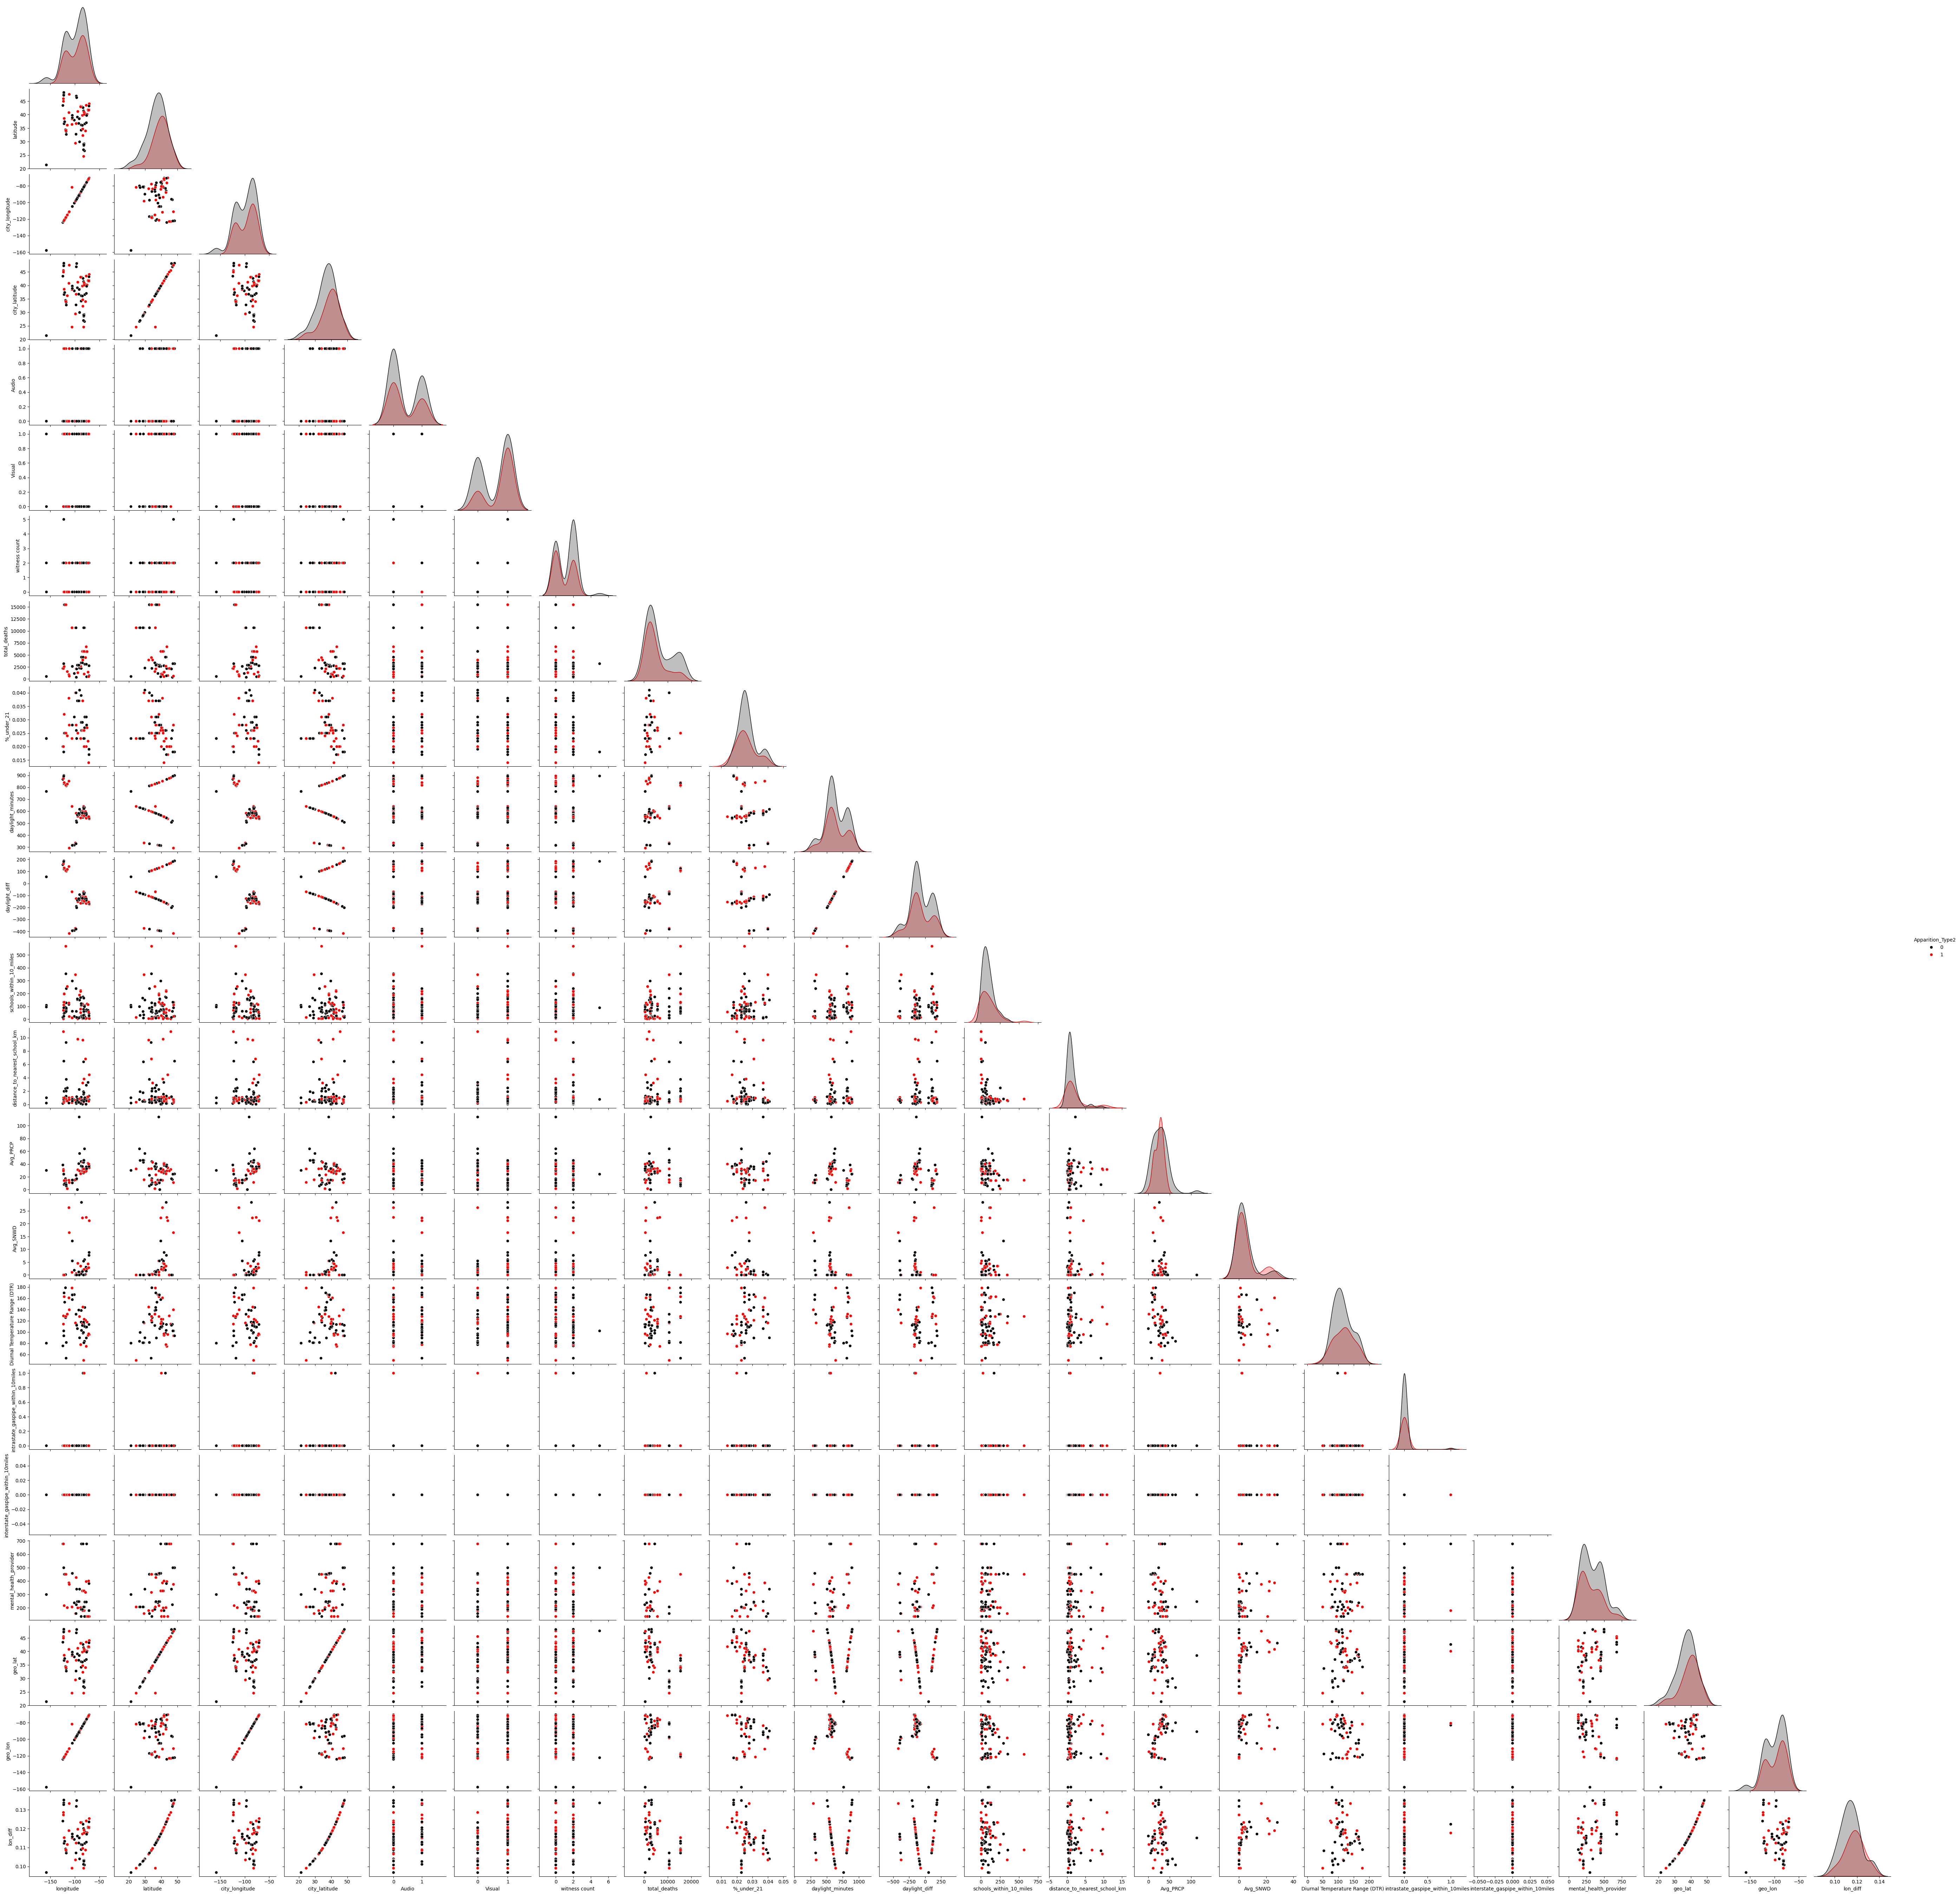

In [116]:
import seaborn as sb 
import pandas as pd 
import matplotlib.pyplot as plt 

#sb.pairplot(filtered_df,corner=True,kind='kde')  
sb.pairplot(filtered_df,corner=True,hue='Apparition_Type2', palette={0:'black',1:'red',2:'blue',3:'orange'})


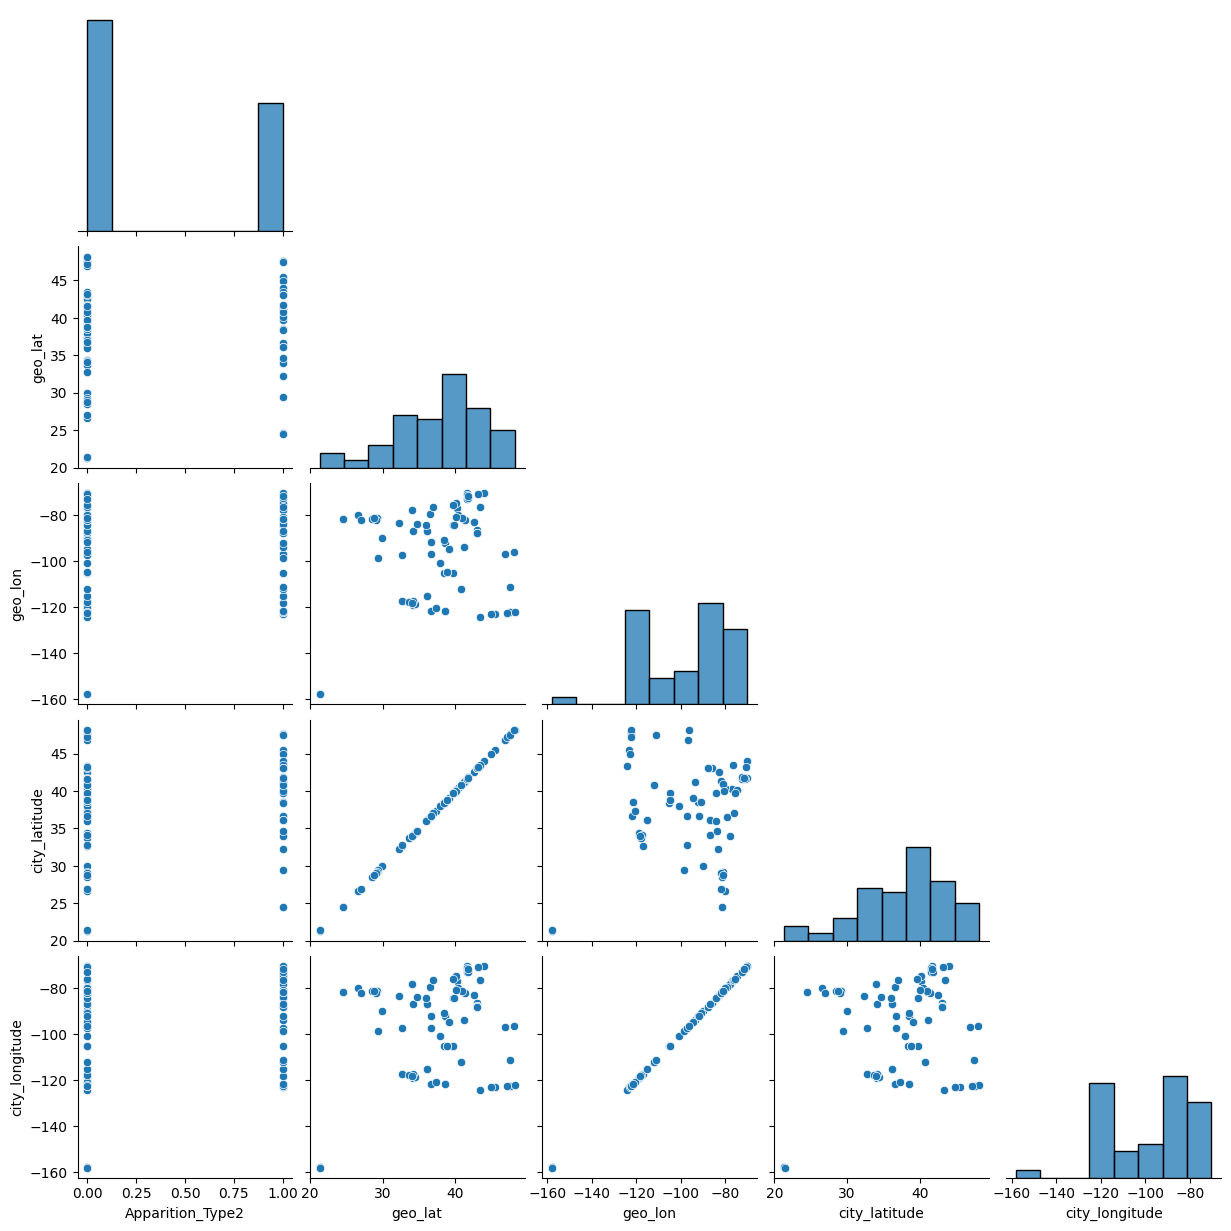

In [119]:
target_features = ['Apparition_Type2','geo_lat','geo_lon','city_latitude','city_longitude']
sb.pairplot(filtered_df[target_features],corner=True)

## Part 2.

## Part 3. 

## Part 4. 